#### Time Series Forecast Study with Python: Monthly Sales of French Champagne

In [2]:

# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3
statsmodels: 0.10.1


In [30]:
os.getcwd()

os.chdir("/Users/kkattidis/Documents/GitHub repos/python-data-analysis")


In [32]:
# separate out a validation dataset
from pandas import read_csv

data_folder = os.getcwd()
series = read_csv('./Data/champagne.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('./Data/dataset.csv', header=False)
validation.to_csv('./Data/validation.csv', header=False)

Dataset 93, Validation 12


In [33]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance.

This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.

The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

In [53]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

In [55]:
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


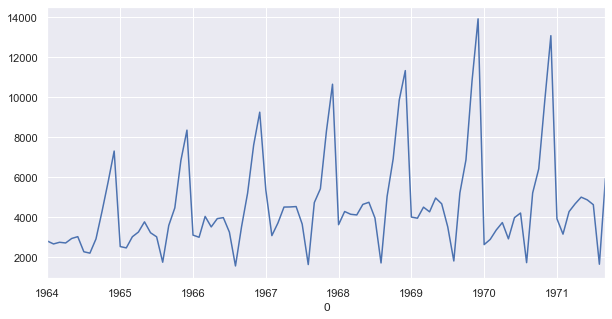

In [61]:

from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns
#sns.set_style('whitegrid')
sns.set(style="darkgrid")
%matplotlib inline

series.plot(figsize=(10,5))
pyplot.show()

We can confirm the assumption that the seasonality is a yearly cycle by eyeballing line plots of the dataset by year.

The example below takes the 7 full years of data as separate groups and creates one line plot for each. The line plots are aligned vertically to help spot any year-to-year pattern.

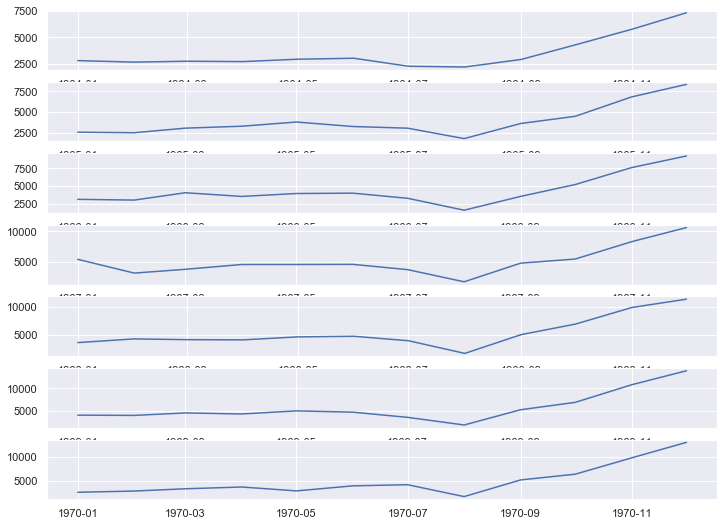

In [79]:
from pandas import DataFrame
from pandas import Grouper
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure(figsize=(12,9))

i = 1
n_groups = len(groups)

for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

In [68]:
groups = series['1964':'1970'].groupby(Grouper(freq='A'))

groups

In [69]:
for name, group in series['1964':'1970'].groupby(Grouper(freq='A')):
    print(name)
    print(group)
    print('\n')

1964-12-31 00:00:00
0
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
1964-06-01    3036
1964-07-01    2282
1964-08-01    2212
1964-09-01    2922
1964-10-01    4301
1964-11-01    5764
1964-12-01    7312
Name: 1, dtype: int64


1965-12-31 00:00:00
0
1965-01-01    2541
1965-02-01    2475
1965-03-01    3031
1965-04-01    3266
1965-05-01    3776
1965-06-01    3230
1965-07-01    3028
1965-08-01    1759
1965-09-01    3595
1965-10-01    4474
1965-11-01    6838
1965-12-01    8357
Name: 1, dtype: int64


1966-12-31 00:00:00
0
1966-01-01    3113
1966-02-01    3006
1966-03-01    4047
1966-04-01    3523
1966-05-01    3937
1966-06-01    3986
1966-07-01    3260
1966-08-01    1573
1966-09-01    3528
1966-10-01    5211
1966-11-01    7614
1966-12-01    9254
Name: 1, dtype: int64


1967-12-31 00:00:00
0
1967-01-01     5375
1967-02-01     3088
1967-03-01     3718
1967-04-01     4514
1967-05-01     4520
1967-06-01     4539
1967-07-01     3663
1967-08-01     1

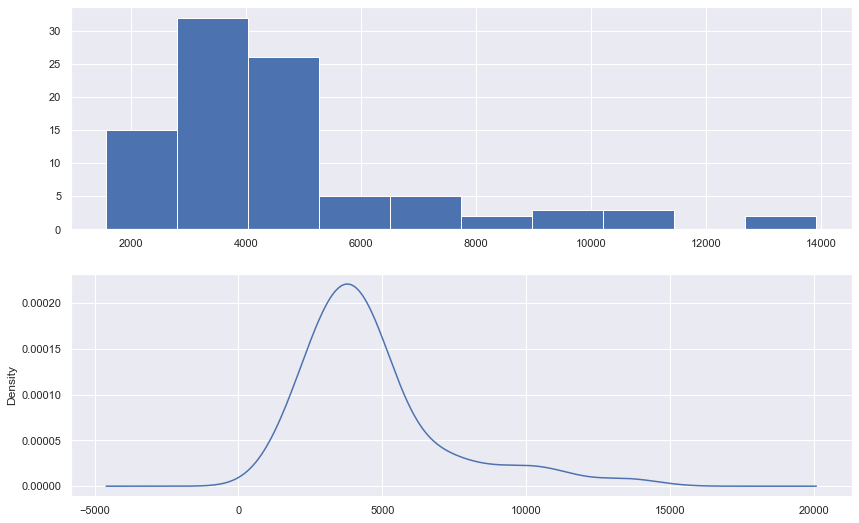

In [86]:
pyplot.figure(1, figsize=(14,9))
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

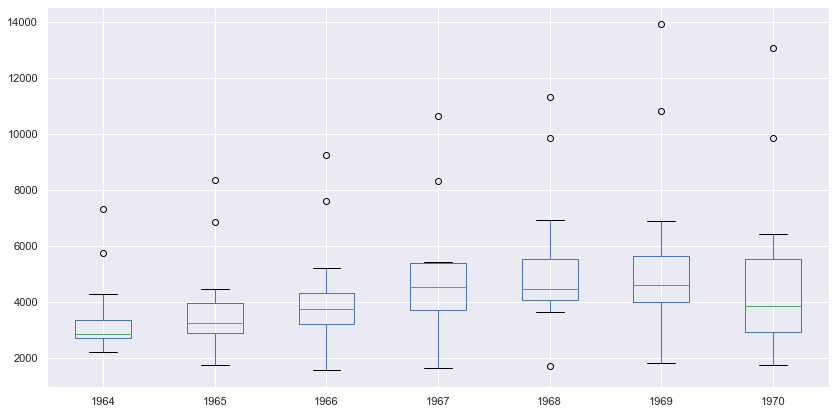

In [89]:
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure(figsize=(14,7))
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

## 6. ARIMA Models
In this section, we will develop Autoregressive Integrated Moving Average, or ARIMA, models for the problem.

We will approach modeling by both manual and automatic configuration of the ARIMA model. This will be followed by a third step of investigating the residual errors of the chosen model.

As such, this section is broken down into 3 steps:

Manually Configure the ARIMA.
Automatically Configure the ARIMA.
Review Residual Errors.



### 6.1 Manually Configured ARIMA

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is almost certainly non-stationary. We can make it stationary this by first differencing the series and using a statistical test to confirm that the result is stationary.

The seasonality in the series is seemingly year-to-year. Seasonal data can be differenced by subtracting the observation from the same time in the previous cycle, in this case the same month in the previous year. This does mean that we will lose the first year of observations as there is no prior year to difference with.

The example below creates a deseasonalized version of the series and saves it to file stationary.csv.

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


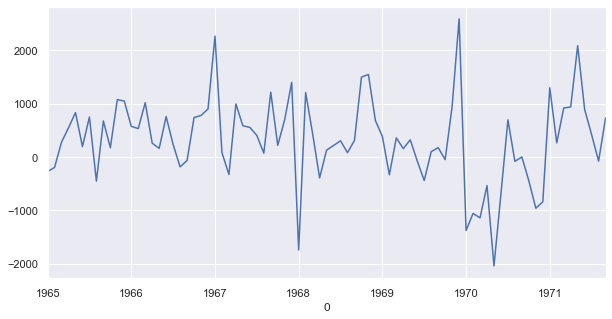

In [173]:
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]

pyplot.figure(figsize=(10,5))

# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('./Data/stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()

Running the example outputs the result of a statistical significance test of whether the differenced series is stationary. Specifically, the augmented Dickey-Fuller test.

The results show that the test statistic value -7.134898 is smaller than the critical value at 1% of -3.515. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

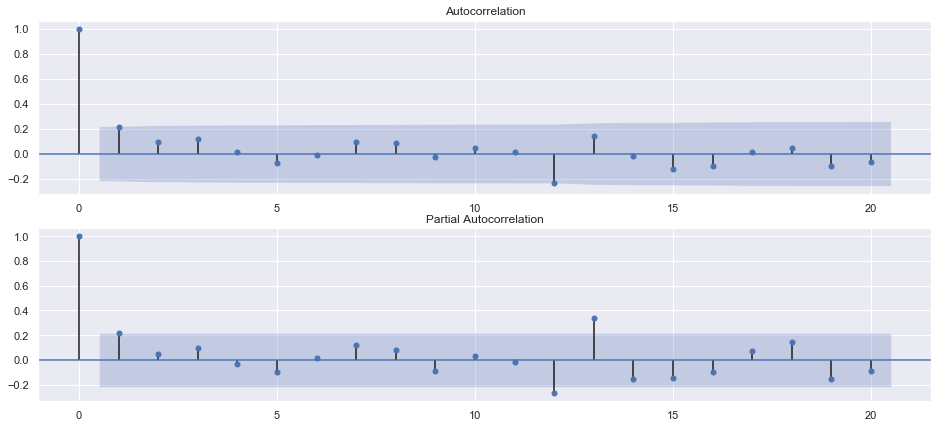

In [178]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('./Data/stationary.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(figsize=(16,7))
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

Below are some observations from the plots.

The ACF shows a significant lag for 1 month.
The PACF shows a significant lag for 1 month, with perhaps some significant lag at 12 and 13 months.
Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA.
A good starting point for the p and q values is also 1.

The PACF plot also suggests that there is still some seasonality present in the differenced data.

We may consider a better model of seasonality, such as modeling it directly and explicitly removing it from the model rather than seasonal differencing.

In [204]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=8089.876, Expected=8314
>Predicted=9742.713, Expected=10651
>Predicted=5986.916, Expected=3633
>Predicted=3887.217, Expected=4292
>Predicted=4038.126, Expected=4154
>Predicted=4992.347, Expected=4121
>Predicted=5156.507, Expected=4647
>Predicted=5046.679, Expected=4753
>Predicted=4143.820, Expected=3965
>Predicted=2102.951, Expected=1723
>Predicted=5228.304, Expected=5048
>Predicted=5873.403, Expected=6922
>Predicted=8571.359, Expected=9858
>Predicted=11006.034, Expected=11331
>Predicted=4087.497, Expected=4016
>Predicted=4771.839, Expected=3957
>Predicted=4676.142, Expected=4510
>Predicted=4583.390, Expected=4276
>Predicted=5117.361, Expected=4968
>Predicted=5208.142, Expected=4677
>Predicted=4436.380, Expected=3523
>Predicted=2180.914, Expected=1821
>Predicted=5471.252, Expected=5222
>Predicted=7337.579, Expected=6872
>Predicted=10268.351, Expected=10803
>Predicted=11725.360, Expected=13916
>Predicted=4519.488, Expected=2639
>Predicted=4605.949, Expected=2899
>Predicted=49

### 6.2 Grid Search ARIMA Hyperparameters
The ACF and PACF plots suggest that an ARIMA(1,0,1) or similar may be the best that we can do.

To confirm this analysis, we can grid search a suite of ARIMA hyperparameters and check that no models result in better out of sample RMSE performance.

In this section, we will search values of p, d, and q for combinations (skipping those that fail to converge), and find the combination that results in the best performance on the test set. We will use a grid search to explore all combinations in a subset of integer values.

Specifically, we will search all combinations of the following parameters:

p: 0 to 6.
d: 0 to 2.
q: 0 to 6.
This is (7 * 3 * 7), or 147, potential runs of the test harness and will take some time to execute.

It may be interesting to evaluate MA models with a lag of 12 or 13 as were noticed as potentially interesting from reviewing the ACF and PACF plots. Experimentation suggested that these models may not be stable, resulting in errors in the underlying mathematical libraries.

The complete worked example with the grid search version of the test harness is listed below.

In [203]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=939.464
ARIMA(0, 0, 2) RMSE=962.289
ARIMA(0, 0, 3) RMSE=944.237
ARIMA(0, 0, 4) RMSE=958.790
ARIMA(0, 0, 5) RMSE=986.836
ARIMA(0, 0, 6) RMSE=1087.014
ARIMA(0, 1, 1) RMSE=958.301
ARIMA(0, 2, 1) RMSE=1146.987
ARIMA(1, 0, 0) RMSE=944.449
ARIMA(1, 1, 0) RMSE=1070.204
ARIMA(1, 1, 1) RMSE=956.942
ARIMA(1, 2, 0) RMSE=1555.858
ARIMA(2, 0, 0) RMSE=955.134
ARIMA(2, 0, 1) RMSE=948.634
ARIMA(2, 1, 0) RMSE=1030.467
ARIMA(2, 1, 1) RMSE=980.953
ARIMA(2, 2, 0) RMSE=1346.598
ARIMA(2, 2, 1) RMSE=1039.635
ARIMA(3, 0, 0) RMSE=959.165
ARIMA(3, 1, 0) RMSE=1028.226
ARIMA(3, 1, 1) RMSE=979.939
ARIMA(3, 2, 0) RMSE=1244.846
ARIMA(4, 0, 0) RMSE=968.411
ARIMA(4, 0, 1) RMSE=908.279
ARIMA(4, 1, 0) RMSE=1046.524
ARIMA(4, 1, 1) RMSE=1006.258
ARIMA(4, 1, 2) RMSE=993.653
ARIMA(4, 2, 0) RMSE=1227.556
ARIMA(4, 2, 1) RMSE=1055.488
ARIMA(5, 0, 0) RMSE=987.690
ARIMA(5, 1, 0) RMSE=1042.642
ARIMA(5, 1, 1) RMSE=1023.402
ARIMA(5, 1, 2) RMSE=1004.163
ARIMA(5, 2, 1) RMSE=1053.720
ARIMA(6, 0, 0) RMSE=996.466
ARI

### 6.3 Review Residual Errors
A good final check of a model is to review residual forecast errors.

Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

We can check this by using summary statistics and plots to investigate the residual errors from the ARIMA(0, 0, 1) model. The example below calculates and summarizes the residual forecast errors.



0
count    47.000000
mean    165.904730
std     934.696204
min   -2164.247449
25%    -289.651596
50%     191.759548
75%     732.992187
max    2367.304815


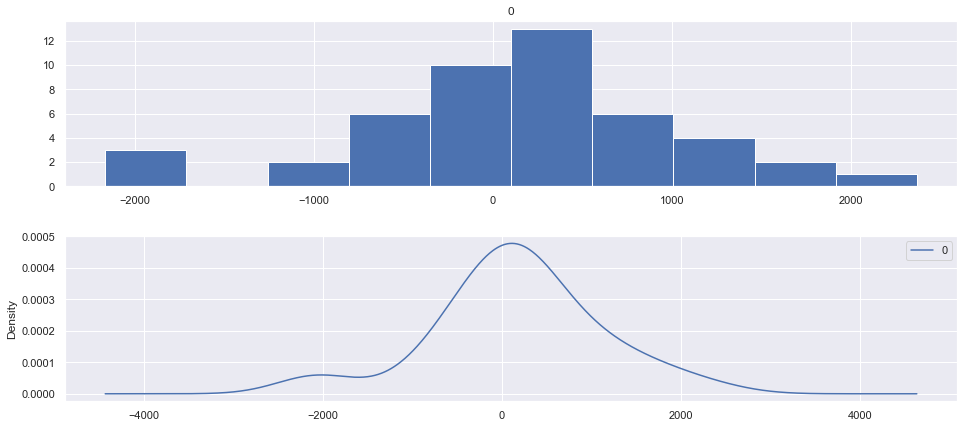

In [206]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure(figsize=(16,7))
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

0
count    47.000000
mean    165.904730
std     934.696204
min   -2164.247449
25%    -289.651596
50%     191.759548
75%     732.992187
max    2367.304815


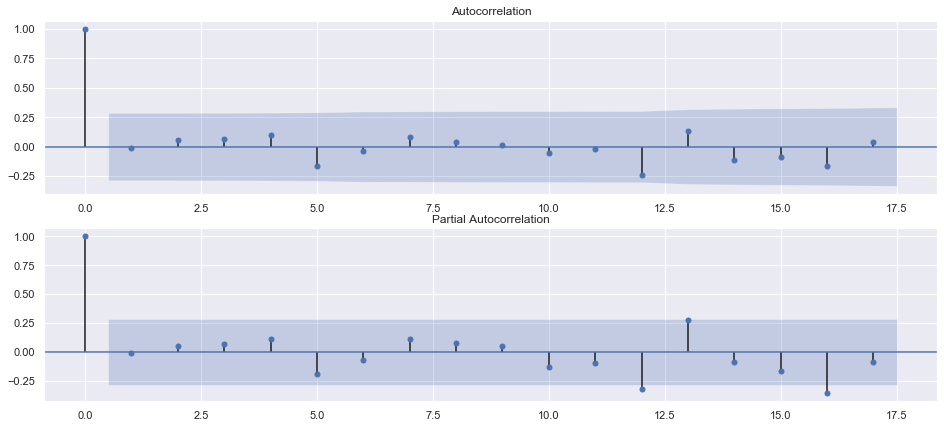

In [208]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure(figsize=(16,7))
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

## 7. Model Validation
After models have been developed and a final model selected, it must be validated and finalized.

Validation is an optional part of the process, but one that provides a ‘last check’ to ensure we have not fooled or misled ourselves.

This section includes the following steps:

Finalize Model: Train and save the final model.
Make Prediction: Load the finalized model and make a prediction.
Validate Model: Load and validate the final model.

### 7.1 Finalize Model
Finalizing the model involves fitting an ARIMA model on the entire dataset, in this case on a transformed version of the entire dataset.

Once fit, the model can be saved to file for later use.

The example below trains an ARIMA(0,0,1) model on the dataset and saves the whole fit object and the bias to file.

In [209]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

Running the example creates two local files:

- model.pkl This is the ARIMAResult object from the call to ARIMA.fit(). This includes the coefficients and all other internal data returned when fitting the model.
- model_bias.npy This is the bias value stored as a one-row, one-column NumPy array.

### 7.2 Make Prediction
A natural case may be to load the model and make a single forecast.

This is relatively straightforward and involves restoring the saved model and the bias and calling the forecast() method. To invert the seasonal differencing, the historical data must also be loaded.

The example below loads the model, makes a prediction for the next time step, and prints the prediction.

In [211]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 6794.773


### 7.3 Validate Model
We can load the model and use it in a pretend operational manner.

In the test harness section, we saved the final 12 months of the original dataset in a separate file to validate the final model.

We can load this validation.csv file now and use it see how well our model really is on “unseen” data.

There are two ways we might proceed:

- Load the model and use it to forecast the next 12 months. The forecast beyond the first one or two months will quickly start to degrade in skill.
- Load the model and use it in a rolling-forecast manner, updating the transform and model for each time step. This is the preferred method as it is how one would use this model in practice as it would achieve the best performance.

As with model evaluation in previous sections, we will make predictions in a rolling-forecast manner. This means that we will step over lead times in the validation dataset and take the observations as an update to the history.

>Predicted=6794.773, Expected=6981
>Predicted=10101.763, Expected=9851
>Predicted=13219.067, Expected=12670
>Predicted=3996.535, Expected=4348
>Predicted=3465.934, Expected=3564
>Predicted=4522.683, Expected=4577
>Predicted=4901.336, Expected=4788
>Predicted=5190.094, Expected=4618
>Predicted=4930.190, Expected=5312
>Predicted=4944.785, Expected=4298
>Predicted=1699.409, Expected=1413
>Predicted=6085.324, Expected=5877
RMSE: 361.110


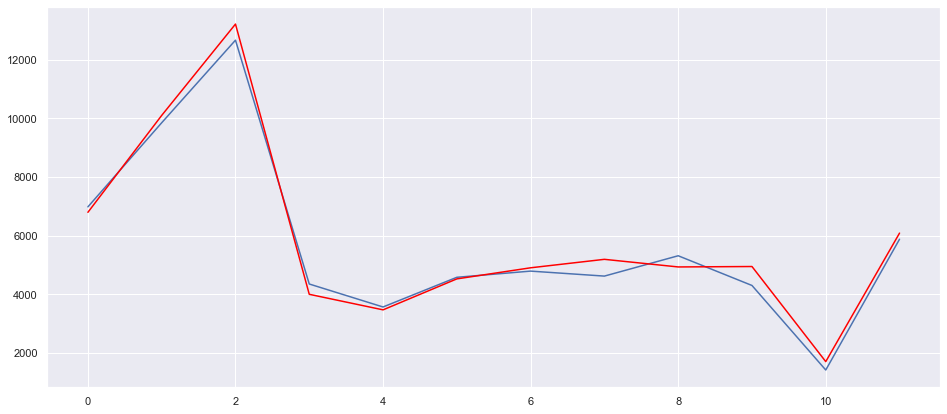

In [213]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('./Data/validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.figure(figsize=(16,7))
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

Summary
In this tutorial, you discovered the steps and the tools for a time series forecasting project with Python.

We have covered a lot of ground in this tutorial; specifically:

- How to develop a test harness with a performance measure and evaluation method and how to quickly develop a baseline forecast and skill.
- How to use time series analysis to raise ideas for how to best model the forecast problem.
- How to develop an ARIMA model, save it, and later load it to make predictions on new data.